# Facebook Ads Analysis ‚Äî 2021 (Step by Step)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.grid'] = True

CSV_PATH = Path('facebook_ads_data.csv')  

def read_data(csv_path: Path) -> pd.DataFrame:
    if not csv_path.exists():
        raise FileNotFoundError(
            f"–ù–µ –∑–Ω–∞–π–¥–µ–Ω–æ {csv_path}. –ó–∞–≤–∞–Ω—Ç–∞–∂—Ç–µ —Ñ–∞–π–ª —ñ –ø–æ–∫–ª–∞–¥—ñ—Ç—å –π–æ–≥–æ –ø–æ—Ä—É—á —ñ–∑ –Ω–æ—É—Ç–±—É–∫–æ–º."
        )
    df = pd.read_csv(csv_path)
    df.columns = [c.strip().lower() for c in df.columns]

   
    rename_map = {}
    # ad_date
    if 'ad_date' not in df.columns:
        for alt in ['date', 'day', 'dt', 'ad date']:
            if alt in df.columns:
                rename_map[alt] = 'ad_date'
                break
    # campaign
    if 'campaign' not in df.columns:
        for alt in ['campaign_name', 'campaign id', 'campaign_name_id', 'name']:
            if alt in df.columns:
                rename_map[alt] = 'campaign'
                break
    # total_spend
    if 'total_spend' not in df.columns:
        for alt in ['spend', 'cost', 'amount_spent']:
            if alt in df.columns:
                rename_map[alt] = 'total_spend'
                break
    # total_value
    if 'total_value' not in df.columns:
        for alt in ['revenue', 'value', 'purchases_value', 'total_revenue']:
            if alt in df.columns:
                rename_map[alt] = 'total_value'
                break

    if rename_map:
        df = df.rename(columns=rename_map)

    required = {'ad_date', 'campaign', 'total_spend', 'total_value'}
    missing = required - set(df.columns)
    if missing:
        raise ValueError(
            f"–í—ñ–¥—Å—É—Ç–Ω—ñ –æ–±–æ–≤'—è–∑–∫–æ–≤—ñ —Å—Ç–æ–≤–ø—Ü—ñ: {missing}. –î–æ—Å—Ç—É–ø–Ω—ñ: {list(df.columns)}"
        )

    # ROMI = (total_value - total_spend)/total_spend
    df['romi'] = np.where(df['total_spend'] == 0, np.nan,
                          (df['total_value'] - df['total_spend']) / df['total_spend'])

    return df

try:
    df = read_data(CSV_PATH)
    display_cols = ['ad_date', 'campaign', 'total_spend', 'total_value', 'romi']
    display(df.head()[[c for c in display_cols if c in df.columns]])
except Exception as e:
    print(e)
    df = None


ad_date   campaign  total_spend  total_value      romi
0  2022-11-05  Expansion         0.00         0.00       NaN
1  2022-11-01  Expansion         0.00         0.00       NaN
2  2022-10-31  Expansion       227.45       191.87 -0.156430
3  2022-10-30  Expansion       335.91       472.61  0.406954
4  2022-10-29  Expansion       714.03       680.34 -0.047183

In [2]:
# === –ü–µ—Ä–µ–≤—ñ—Ä–∫–∞ —ñ –æ–±—Ä–æ–±–∫–∞ –¥—É–±–ª—ñ–∫–∞—Ç—ñ–≤ ===

# 1. –ü–æ–≤–Ω—ñ –¥—É–±–ª—ñ–∫–∞—Ç–∏ (—É—Å—ñ –∫–æ–ª–æ–Ω–∫–∏ –∑–±—ñ–≥–∞—é—Ç—å—Å—è)
dup_count_full = df.duplicated().sum()
print(f"–ü–æ–≤–Ω–∏—Ö –¥—É–±–ª—ñ–∫–∞—Ç—ñ–≤ —É —Ç–∞–±–ª–∏—Ü—ñ: {dup_count_full}")

if dup_count_full > 0:
    df = df.drop_duplicates()
    print(f"–ü—ñ—Å–ª—è –≤–∏–¥–∞–ª–µ–Ω–Ω—è –ø–æ–≤–Ω–∏—Ö –¥—É–±–ª—ñ–∫–∞—Ç—ñ–≤: {df.shape[0]} —Ä—è–¥–∫—ñ–≤")

# 2. –î—É–±–ª—ñ–∫–∞—Ç–∏ –ø–æ –∫–ª—é—á—É (ad_date + campaign)
dup_count_key = df.duplicated(subset=['ad_date','campaign']).sum()
print(f"–î—É–±–ª—ñ–∫–∞—Ç—ñ–≤ –ø–æ (ad_date, campaign): {dup_count_key}")

if dup_count_key > 0:
    # –ê–≥—Ä–µ–≥—É—î–º–æ –¥—É–±–ª—ñ–∫–∞—Ç–∏: —Å—É–º—É—î–º–æ total_spend —ñ total_value
    df = (df.groupby(['ad_date','campaign'], as_index=False)
            .agg(total_spend=('total_spend','sum'),
                 total_value=('total_value','sum')))
    df['romi'] = np.where(df['total_spend']==0, np.nan,
                          (df['total_value'] - df['total_spend'])/df['total_spend'])
    print(f"–ü—ñ—Å–ª—è –∞–≥—Ä–µ–≥—É–≤–∞–Ω–Ω—è: {df.shape[0]} —Ä—è–¥–∫—ñ–≤")

df.head()


–ü–æ–≤–Ω–∏—Ö –¥—É–±–ª—ñ–∫–∞—Ç—ñ–≤ —É —Ç–∞–±–ª–∏—Ü—ñ: 0
–î—É–±–ª—ñ–∫–∞—Ç—ñ–≤ –ø–æ (ad_date, campaign): 0


ad_date   campaign  total_spend  total_impressions  total_clicks  \
0  2022-11-05  Expansion         0.00                  0             0   
1  2022-11-01  Expansion         0.00                  0             0   
2  2022-10-31  Expansion       227.45               6054            58   
3  2022-10-30  Expansion       335.91              27562            69   
4  2022-10-29  Expansion       714.03              33358           115   

   total_value   cpc    cpm       ctr      romi  
0         0.00   NaN    NaN       NaN       NaN  
1         0.00   NaN    NaN       NaN       NaN  
2       191.87  3.92  37.57  0.009580 -0.156430  
3       472.61  4.87  12.19  0.002503  0.406954  
4       680.34  6.21  21.41  0.003447 -0.047183

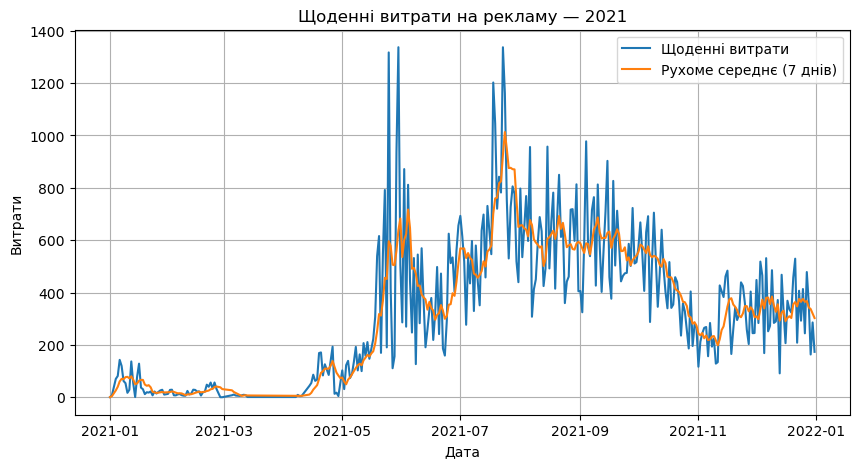

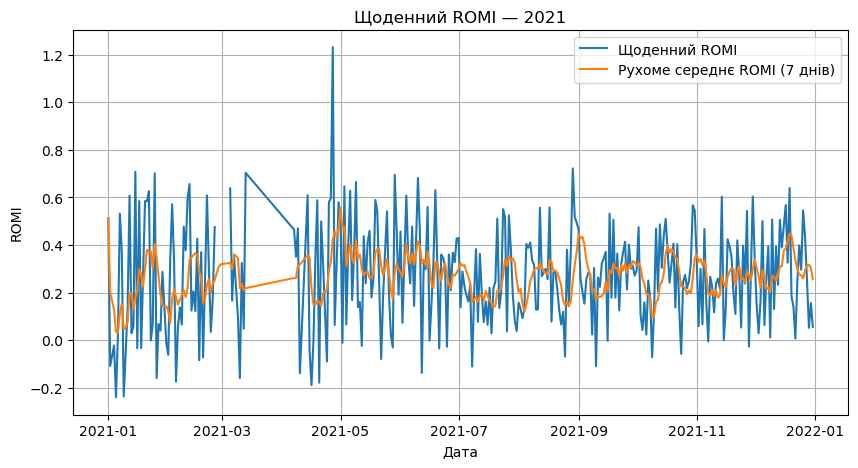

In [3]:
# === 1. –ì—Ä—É–ø—É–≤–∞–Ω–Ω—è –ø–æ –¥–Ω—è—Ö (2021) —ñ –≥—Ä–∞—Ñ—ñ–∫–∏ –≤–∏—Ç—Ä–∞—Ç —Ç–∞ ROMI + rolling ===
if df is not None:
    mask_2021 = (df['ad_date'] >= '2021-01-01') & (df['ad_date'] <= '2021-12-31')
    by_day = (df.loc[mask_2021]
                .groupby('ad_date', as_index=False)
                .agg(total_spend_daily=('total_spend', 'sum'),
                     total_value_daily=('total_value', 'sum')))
    by_day['romi_daily'] = np.where(by_day['total_spend_daily'] == 0, np.nan,
                                    (by_day['total_value_daily'] - by_day['total_spend_daily']) / by_day['total_spend_daily'])

    # –î–ª—è rolling —Ç—Ä–µ–±–∞ –º–∞—Ç–∏ —Ç–∏–ø datetime
    by_day_dt = by_day.copy()
    by_day_dt['ad_date'] = pd.to_datetime(by_day_dt['ad_date'])
    by_day_dt = by_day_dt.sort_values('ad_date')

    # 7-–¥–µ–Ω–Ω–µ —Ä—É—Ö–æ–º–µ —Å–µ—Ä–µ–¥–Ω—î
    by_day_dt['spend_ma7'] = by_day_dt['total_spend_daily'].rolling(window=7, min_periods=1).mean()
    by_day_dt['romi_ma7'] = by_day_dt['romi_daily'].rolling(window=7, min_periods=1).mean()

    # –ì—Ä–∞—Ñ—ñ–∫: —â–æ–¥–µ–Ω–Ω—ñ –≤–∏—Ç—Ä–∞—Ç–∏ + MA7
    plt.figure()
    plt.plot(by_day_dt['ad_date'], by_day_dt['total_spend_daily'], label='–©–æ–¥–µ–Ω–Ω—ñ –≤–∏—Ç—Ä–∞—Ç–∏')
    plt.plot(by_day_dt['ad_date'], by_day_dt['spend_ma7'], label='–†—É—Ö–æ–º–µ —Å–µ—Ä–µ–¥–Ω—î (7 –¥–Ω—ñ–≤)')
    plt.title('–©–æ–¥–µ–Ω–Ω—ñ –≤–∏—Ç—Ä–∞—Ç–∏ –Ω–∞ —Ä–µ–∫–ª–∞–º—É ‚Äî 2021')
    plt.xlabel('–î–∞—Ç–∞')
    plt.ylabel('–í–∏—Ç—Ä–∞—Ç–∏')
    plt.legend()
    plt.show()

    # –ì—Ä–∞—Ñ—ñ–∫: —â–æ–¥–µ–Ω–Ω–∏–π ROMI + MA7
    plt.figure()
    plt.plot(by_day_dt['ad_date'], by_day_dt['romi_daily'], label='–©–æ–¥–µ–Ω–Ω–∏–π ROMI')
    plt.plot(by_day_dt['ad_date'], by_day_dt['romi_ma7'], label='–†—É—Ö–æ–º–µ —Å–µ—Ä–µ–¥–Ω—î ROMI (7 –¥–Ω—ñ–≤)')
    plt.title('–©–æ–¥–µ–Ω–Ω–∏–π ROMI ‚Äî 2021')
    plt.xlabel('–î–∞—Ç–∞')
    plt.ylabel('ROMI')
    plt.legend()
    plt.show()

    by_day_dt.head()



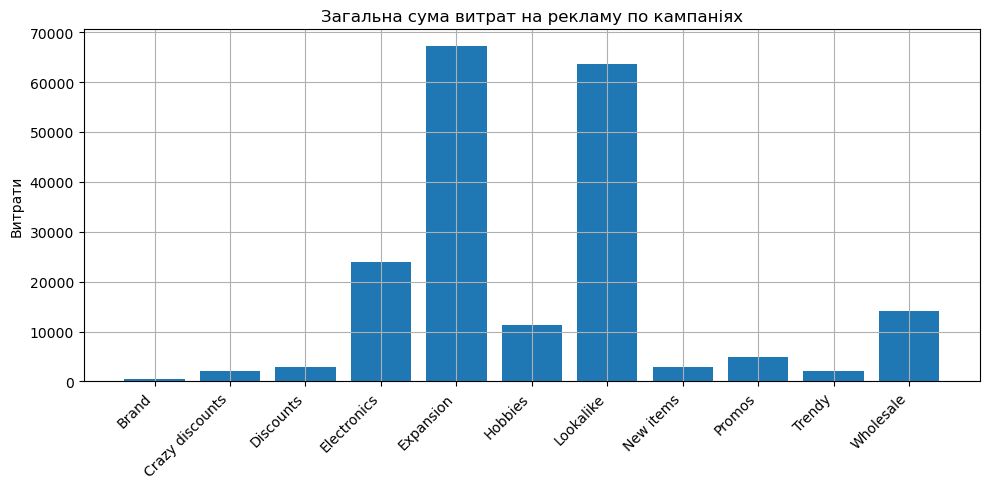

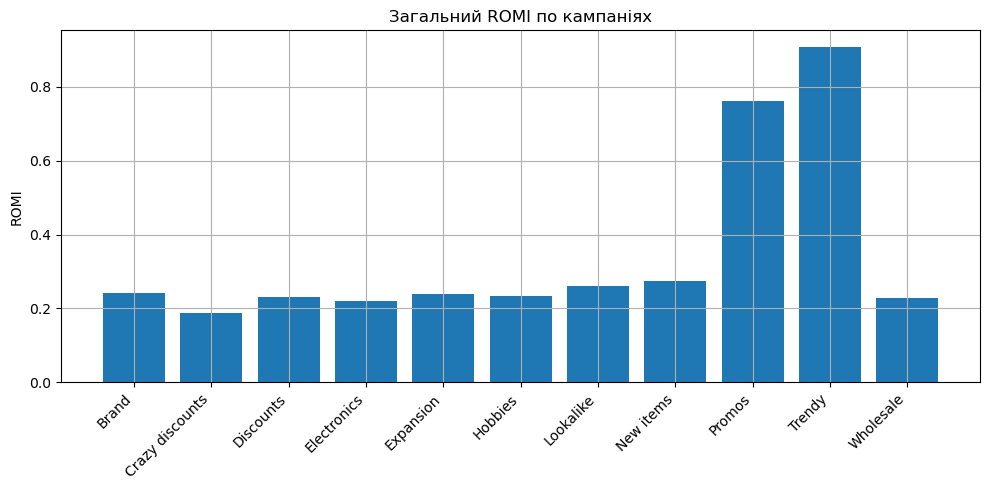

In [4]:
# === 2. –ì—Ä—É–ø—É–≤–∞–Ω–Ω—è –∑–∞ –∫–∞–º–ø–∞–Ω—ñ—è–º–∏ + –≥—Ä–∞—Ñ—ñ–∫–∏ –∑–∞–≥–∞–ª—å–Ω–∏—Ö –≤–∏—Ç—Ä–∞—Ç —ñ –∑–∞–≥–∞–ª—å–Ω–æ–≥–æ ROMI ===
if df is not None:
    by_campaign = (df.groupby('campaign', as_index=False)
                     .agg(total_spend=('total_spend', 'sum'),
                          total_value=('total_value', 'sum')))
    by_campaign['romi'] = np.where(by_campaign['total_spend'] == 0, np.nan,
                                   (by_campaign['total_value'] - by_campaign['total_spend']) / by_campaign['total_spend'])

    # –°—Ç–æ–≤–ø—á–∏–∫–æ–≤–∞ –¥—ñ–∞–≥—Ä–∞–º–∞ –≤–∏—Ç—Ä–∞—Ç –ø–æ –∫–∞–º–ø–∞–Ω—ñ—è—Ö
    plt.figure()
    x = np.arange(len(by_campaign))
    plt.bar(x, by_campaign['total_spend'])
    plt.xticks(x, by_campaign['campaign'], rotation=45, ha='right')
    plt.title('–ó–∞–≥–∞–ª—å–Ω–∞ —Å—É–º–∞ –≤–∏—Ç—Ä–∞—Ç –Ω–∞ —Ä–µ–∫–ª–∞–º—É –ø–æ –∫–∞–º–ø–∞–Ω—ñ—è—Ö')
    plt.ylabel('–í–∏—Ç—Ä–∞—Ç–∏')
    plt.tight_layout()
    plt.show()

    # –°—Ç–æ–≤–ø—á–∏–∫–æ–≤–∞ –¥—ñ–∞–≥—Ä–∞–º–∞ ROMI –ø–æ –∫–∞–º–ø–∞–Ω—ñ—è—Ö
    plt.figure()
    plt.bar(x, by_campaign['romi'])
    plt.xticks(x, by_campaign['campaign'], rotation=45, ha='right')
    plt.title('–ó–∞–≥–∞–ª—å–Ω–∏–π ROMI –ø–æ –∫–∞–º–ø–∞–Ω—ñ—è—Ö')
    plt.ylabel('ROMI')
    plt.tight_layout()
    plt.show()

    by_campaign.head()



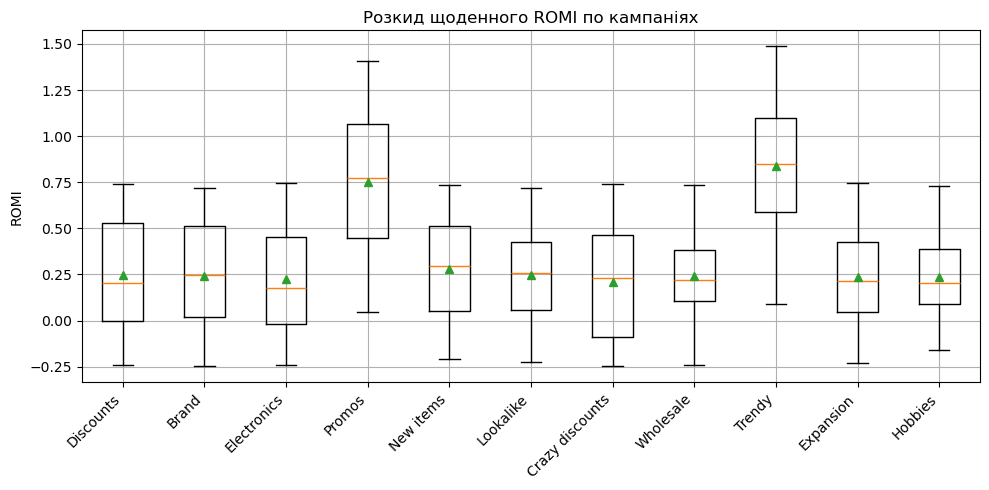

In [5]:
# === 3. Box plot —Ä–æ–∑–∫–∏–¥—É —â–æ–¥–µ–Ω–Ω–æ–≥–æ ROMI –ø–æ –∫–∞–º–ø–∞–Ω—ñ—è—Ö ===
if df is not None:
    # –°–ø–æ—á–∞—Ç–∫—É –æ–±—á–∏—Å–ª–∏–º–æ —â–æ–¥–µ–Ω–Ω–∏–π ROMI —É —Ä–æ–∑—Ä—ñ–∑—ñ –∫–∞–º–ø–∞–Ω—ñ–π
    daily_campaign = (df.groupby(['ad_date', 'campaign'], as_index=False)
                        .agg(total_spend=('total_spend', 'sum'),
                             total_value=('total_value', 'sum')))
    daily_campaign['romi'] = np.where(daily_campaign['total_spend'] == 0, np.nan,
                                      (daily_campaign['total_value'] - daily_campaign['total_spend'])/daily_campaign['total_spend'])

    # –ü–æ–±—É–¥–æ–≤–∞ boxplot: –æ–¥–Ω–∞ –∫–æ—Ä–æ–±–∫–∞ –Ω–∞ –∫–∞–º–ø–∞–Ω—ñ—é
    # –ü—ñ–¥–≥–æ—Ç—É—î–º–æ –¥–∞–Ω—ñ —è–∫ —Å–ø–∏—Å–æ–∫ –º–∞—Å–∏–≤—ñ–≤
    campaigns = daily_campaign['campaign'].unique()
    data_for_box = [daily_campaign.loc[daily_campaign['campaign'] == c, 'romi'].dropna().values for c in campaigns]
plt.figure()
plt.boxplot(data_for_box, tick_labels=campaigns, vert=True, showmeans=True)
plt.xticks(rotation=45, ha='right')
plt.title('–†–æ–∑–∫–∏–¥ —â–æ–¥–µ–Ω–Ω–æ–≥–æ ROMI –ø–æ –∫–∞–º–ø–∞–Ω—ñ—è—Ö')
plt.ylabel('ROMI')
plt.tight_layout()
plt.show()


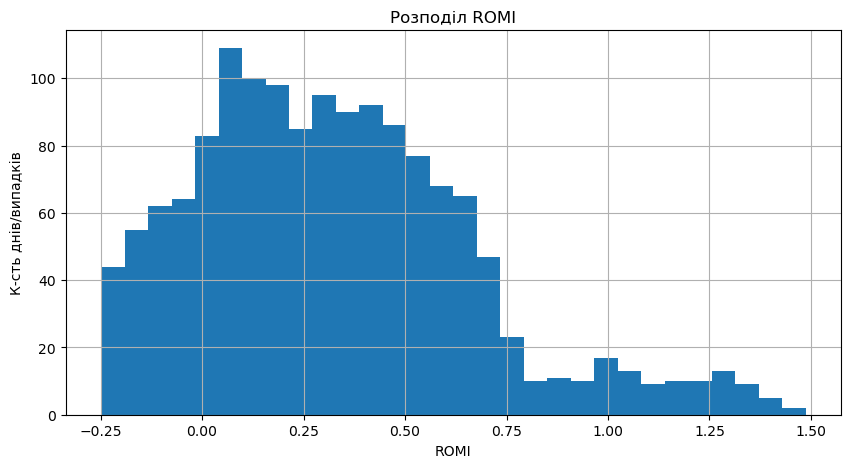

In [6]:
# === 4. –ì—ñ—Å—Ç–æ–≥—Ä–∞–º–∞ ROMI –ø–æ –≤—Å—ñ–π —Ç–∞–±–ª–∏—Ü—ñ ===
if df is not None:
    plt.figure()
    romi_clean = df['romi'].dropna()
    plt.hist(romi_clean, bins=30)
    plt.title('–†–æ–∑–ø–æ–¥—ñ–ª ROMI')
    plt.xlabel('ROMI')
    plt.ylabel('–ö-—Å—Ç—å –¥–Ω—ñ–≤/–≤–∏–ø–∞–¥–∫—ñ–≤')
    plt.show()



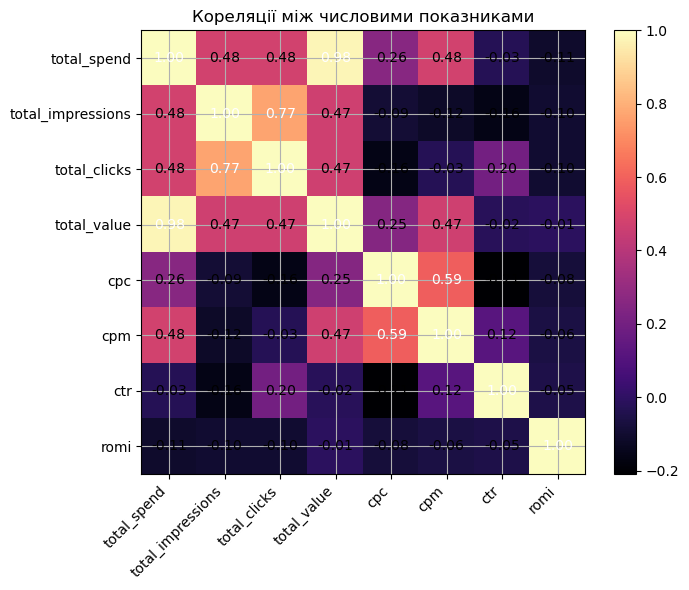

–ù–∞–π–≤–∏—â–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ—è: total_spend <-> total_value = 0.98
–ù–∞–π–Ω–∏–∂—á–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ—è: cpc <-> ctr = -0.21

–ö–æ—Ä–µ–ª—è—Ü—ñ—ó –∑ total_value (—Å–ø–∞–¥–∞–Ω–Ω—è):
total_spend          0.98
total_clicks         0.47
total_impressions    0.47
cpm                  0.47
cpc                  0.25
romi                -0.01
ctr                 -0.02


In [7]:
# === 5. –¢–µ–ø–ª–æ–≤–∞ –∫–∞—Ä—Ç–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ–π –º—ñ–∂ –í–°–Ü–ú–ê —á–∏—Å–ª–æ–≤–∏–º–∏ –ø–æ–∫–∞–∑–Ω–∏–∫–∞–º–∏  ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. –í–∏–±—ñ—Ä —á–∏—Å–ª–æ–≤–∏—Ö —Å—Ç–æ–≤–ø—Ü—ñ–≤
numeric_df = df.select_dtypes(include=[np.number]).copy()
if numeric_df.shape[1] < 2:
    raise RuntimeError(f"–ó–Ω–∞–π–¥–µ–Ω–æ –ª–∏—à–µ {numeric_df.shape[1]} —á–∏—Å–ª–æ–≤–∏—Ö –∫–æ–ª–æ–Ω–æ–∫. –ü–æ—Ç—Ä—ñ–±–Ω–æ ‚â•2 –¥–ª—è –∫–æ—Ä–µ–ª—è—Ü—ñ–π.")

# 2. –û–±—á–∏—Å–ª–µ–Ω–Ω—è –∫–æ—Ä–µ–ª—è—Ü—ñ–π
corr = numeric_df.corr(numeric_only=True)
corr_disp = corr.round(2)

# 3. –ü–æ–±—É–¥–æ–≤–∞ —Ç–µ–ø–ª–æ–≤–æ—ó –∫–∞—Ä—Ç–∏
plt.figure(figsize=(8,6))
im = plt.imshow(corr_disp.values, interpolation='nearest', cmap='magma')
plt.title('–ö–æ—Ä–µ–ª—è—Ü—ñ—ó –º—ñ–∂ —á–∏—Å–ª–æ–≤–∏–º–∏ –ø–æ–∫–∞–∑–Ω–∏–∫–∞–º–∏')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(ticks=np.arange(len(corr_disp.columns)), labels=corr_disp.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(corr_disp.index)), labels=corr_disp.index)

for i in range(corr_disp.shape[0]):
    for j in range(corr_disp.shape[1]):
        val = corr_disp.values[i, j]
        color = 'white' if abs(val) > 0.5 else 'black'
        plt.text(j, i, f"{val:.2f}", ha='center', va='center', color=color)

plt.tight_layout()
plt.show()

# 4. –ù–∞–π–≤–∏—â–∞ / –Ω–∞–π–Ω–∏–∂—á–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ—ó
mask_upper = np.triu(np.ones_like(corr, dtype=bool), k=1)
pairs = (
    pd.DataFrame(corr.where(mask_upper))
      .stack()
      .reset_index()
      .rename(columns={'level_0': 'var1', 'level_1': 'var2', 0: 'corr'})
)

if pairs.empty:
    print("–ù–µ –∑–Ω–∞–π–¥–µ–Ω–æ –≤–∞–ª—ñ–¥–Ω–∏—Ö –ø–∞—Ä –¥–ª—è –ø–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –∫–æ—Ä–µ–ª—è—Ü—ñ–π.")
else:
    best = pairs.loc[pairs['corr'].idxmax()]
    worst = pairs.loc[pairs['corr'].idxmin()]
    print(f"–ù–∞–π–≤–∏—â–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ—è: {best['var1']} <-> {best['var2']} = {best['corr']:.2f}")
    print(f"–ù–∞–π–Ω–∏–∂—á–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ—è: {worst['var1']} <-> {worst['var2']} = {worst['corr']:.2f}")

# 5. –ö–æ—Ä–µ–ª—è—Ü—ñ—ó –∑ total_value
if 'total_value' in corr.columns:
    tv_corr = corr['total_value'].drop(labels=['total_value'], errors='ignore').sort_values(ascending=False).round(2)
    print("\n–ö–æ—Ä–µ–ª—è—Ü—ñ—ó –∑ total_value (—Å–ø–∞–¥–∞–Ω–Ω—è):")
    print(tv_corr.to_string())
else:
    print("\n–ö–æ–ª–æ–Ω–∫–∏ 'total_value' –Ω–µ–º–∞—î —Å–µ—Ä–µ–¥ —á–∏—Å–ª–æ–≤–∏—Ö –¥–ª—è —Ä–æ–∑—Ä–∞—Ö—É–Ω–∫—É –∫–æ—Ä–µ–ª—è—Ü—ñ–π.")


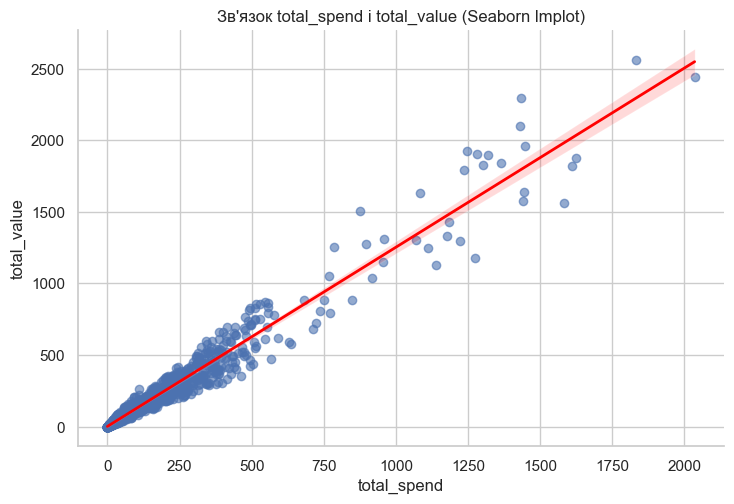

In [8]:
# === 6. –¢–æ—á–∫–æ–≤–∞ –¥—ñ–∞–≥—Ä–∞–º–∞ –∑ –ª—ñ–Ω—ñ–π–Ω–æ—é —Ä–µ–≥—Ä–µ—Å—ñ—î—é (lmplot) ===

import seaborn as sns
sns.set(style="whitegrid")

# –ü–æ–±—É–¥–æ–≤–∞ lmplot
sns.lmplot(
    data=df,
    x="total_spend",
    y="total_value",
    height=5,       
    aspect=1.5,     
    scatter_kws={"alpha":0.6},  
    line_kws={"color":"red", "lw":2}  
)

plt.title("–ó–≤'—è–∑–æ–∫ total_spend —ñ total_value (Seaborn lmplot)", fontsize=12)
plt.xlabel("total_spend")
plt.ylabel("total_value")
plt.show()



# üìä –ê–Ω–∞–ª—ñ–∑ —Ä–µ–∫–ª–∞–º–Ω–∏—Ö –∫–∞–º–ø–∞–Ω—ñ–π Facebook ‚Äî 2021

### –ê–≤—Ç–æ—Ä:
**Oleh Ustimov**

### –ú–µ—Ç–∞:
–î–æ—Å–ª—ñ–¥–∏—Ç–∏ –µ—Ñ–µ–∫—Ç–∏–≤–Ω—ñ—Å—Ç—å —Ä–µ–∫–ª–∞–º–Ω–∏—Ö –∫–∞–º–ø–∞–Ω—ñ–π Facebook –∑–∞ 2021 —Ä—ñ–∫, –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—é—á–∏ —ñ–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∏ **Python** —Ç–∞ **Pandas**.  
–ó–∞–≤–¥–∞–Ω–Ω—è –≤–∫–ª—é—á–∞—î –æ–±—Ä–æ–±–∫—É –¥–∞–Ω–∏—Ö, –ø–æ–±—É–¥–æ–≤—É –∫–ª—é—á–æ–≤–∏—Ö –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ–π —Ç–∞ –∞–Ω–∞–ª—ñ–∑ –≤–∑–∞—î–º–æ–∑–≤‚Äô—è–∑–∫—ñ–≤ –º—ñ–∂ –º–µ—Ç—Ä–∏–∫–∞–º–∏.

---

### üîç –ö—Ä–æ–∫–∏ –∞–Ω–∞–ª—ñ–∑—É:

1. **–ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è –¥–∞–Ω–∏—Ö** –∑ —Ñ–∞–π–ª—É `facebook_ads_data.csv` —É DataFrame Pandas.  
2. **–ì—Ä—É–ø—É–≤–∞–Ω–Ω—è –ø–æ –¥–Ω—è—Ö (2021):**  
   - –ø–æ–±—É–¥–æ–≤–∞ –≥—Ä–∞—Ñ—ñ–∫–∞ —â–æ–¥–µ–Ω–Ω–∏—Ö –≤–∏—Ç—Ä–∞—Ç;  
   - –ø–æ–±—É–¥–æ–≤–∞ –≥—Ä–∞—Ñ—ñ–∫–∞ —â–æ–¥–µ–Ω–Ω–æ–≥–æ ROMI;  
   - —Ä–æ–∑—Ä–∞—Ö—É–Ω–æ–∫ —Ä—É—Ö–æ–º–æ–≥–æ —Å–µ—Ä–µ–¥–Ω—å–æ–≥–æ.  
3. **–ì—Ä—É–ø—É–≤–∞–Ω–Ω—è –∑–∞ –∫–∞–º–ø–∞–Ω—ñ—è–º–∏:**  
   - –∑–∞–≥–∞–ª—å–Ω—ñ –≤–∏—Ç—Ä–∞—Ç–∏ –ø–æ –∫–æ–∂–Ω—ñ–π –∫–∞–º–ø–∞–Ω—ñ—ó;  
   - –∑–∞–≥–∞–ª—å–Ω–∏–π ROMI –ø–æ –∫–∞–º–ø–∞–Ω—ñ—è—Ö.  
4. **Box Plot:** –∞–Ω–∞–ª—ñ–∑ —Ä–æ–∑–∫–∏–¥—É —â–æ–¥–µ–Ω–Ω–æ–≥–æ ROMI –ø–æ –∫–∞–º–ø–∞–Ω—ñ—è—Ö.  
5. **–ì—ñ—Å—Ç–æ–≥—Ä–∞–º–∞:** —Ä–æ–∑–ø–æ–¥—ñ–ª –∑–Ω–∞—á–µ–Ω—å ROMI –ø–æ –≤—Å—ñ–π —Ç–∞–±–ª–∏—Ü—ñ.  
6. **–¢–µ–ø–ª–æ–≤–∞ –∫–∞—Ä—Ç–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ–π:**  
   - –≤–∏–∑–Ω–∞—á–µ–Ω–Ω—è –Ω–∞–π–≤–∏—â–æ—ó —Ç–∞ –Ω–∞–π–Ω–∏–∂—á–æ—ó –∫–æ—Ä–µ–ª—è—Ü—ñ–π;  
   - –≤–∏—è–≤–ª–µ–Ω–Ω—è, –∑ —á–∏–º –Ω–∞–π–±—ñ–ª—å—à–µ –∫–æ—Ä–µ–ª—é—î `total_value`.  
7. **–¢–æ—á–∫–æ–≤–∞ –¥—ñ–∞–≥—Ä–∞–º–∞ (lmplot):**  
   - –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è –∑–≤‚Äô—è–∑–∫—É –º—ñ–∂ `total_spend` —Ç–∞ `total_value` –∑ –ª—ñ–Ω—ñ–π–Ω–æ—é —Ä–µ–≥—Ä–µ—Å—ñ—î—é.

---

### üìÖ –ü–µ—Ä—ñ–æ–¥ –∞–Ω–∞–ª—ñ–∑—É:
**1 —Å—ñ—á–Ω—è 2021 ‚Äî 31 –≥—Ä—É–¥–Ω—è 2021**

### üß∞ –í–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω—ñ –±—ñ–±–ª—ñ–æ—Ç–µ–∫–∏:
`pandas`, `numpy`, `matplotlib`, `seaborn`

